<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Collecting Job Data Using APIs**


Estimated time needed: **45 to 60** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data from GitHub Jobs API
*   Store the collected data into an excel spreadsheet.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ)


In [1]:
import requests # you need this module to make an API call

In [2]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [3]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [4]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [5]:
print(data)   # print the data just to check the output or for debugging

{'message': 'success', 'number': 10, 'people': [{'craft': 'ISS', 'name': 'Mark Vande Hei'}, {'craft': 'ISS', 'name': 'Oleg Novitskiy'}, {'craft': 'ISS', 'name': 'Pyotr Dubrov'}, {'craft': 'ISS', 'name': 'Thomas Pesquet'}, {'craft': 'ISS', 'name': 'Megan McArthur'}, {'craft': 'ISS', 'name': 'Shane Kimbrough'}, {'craft': 'ISS', 'name': 'Akihiko Hoshide'}, {'craft': 'ISS', 'name': 'Anton Shkaplerov'}, {'craft': 'ISS', 'name': 'Klim Shipenko'}, {'craft': 'ISS', 'name': 'Yulia Pereslid'}]}


Print the number of astronauts currently on ISS.


In [6]:
print(data.get('number'))

10


Print the names of the astronauts currently on ISS.


In [7]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 10 astronauts on ISS
And their names are :
Mark Vande Hei
Oleg Novitskiy
Pyotr Dubrov
Thomas Pesquet
Megan McArthur
Shane Kimbrough
Akihiko Hoshide
Anton Shkaplerov
Klim Shipenko
Yulia Pereslid


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using GitHub Jobs API


### Objective: Determine the number of jobs currently open for various technologies


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [8]:
#Import required libraries


In [10]:
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"

Write a function to get the number of jobs for the given technology.<br>
*Note:* The API gives a maximum of 50 jobs per page.<br>
If you get 50 jobs per page, it means there could be some more job listings available.<br>
So if you get 50 jobs per page you should make another API call for next page to check for more jobs.<br>
If you get less than 50 jobs per page, you can take it as the final count.<br>


In [11]:
# trial
response = requests.get(baseurl)

# Parse the response in .json format
data = response.json()

# Check
data

[{'A': 'technology', 'B': 'number of job posting'},
 {'A': 'java', 'B': '92'},
 {'A': 'C', 'B': '184'},
 {'A': 'C#', 'B': '14'},
 {'A': 'C++', 'B': '24'},
 {'A': 'Java', 'B': '92'},
 {'A': 'JavaScript', 'B': '65'},
 {'A': 'Python', 'B': '51'},
 {'A': 'Scala', 'B': '47'},
 {'A': 'Oracle', 'B': '6'},
 {'A': 'SQL Server', 'B': '16'},
 {'A': 'MySQL Server', 'B': '5'},
 {'A': 'PostgreSQL', 'B': '17'},
 {'A': 'MongoDB', 'B': '4'}]

In [12]:
job_listing = []
for i in data:
    job_listing.append(i.get('A'))
    
print(job_listing)

['technology', 'java', 'C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB']


In [13]:
def get_number_of_jobs(technology):
    number_of_jobs = 0
    #your code goes here
    response = requests.get(baseurl)
    data = response.json()
    for datum in data:
        if datum.get('A').lower() == technology.lower():
            number_of_jobs = datum.get('B')
            return technology,number_of_jobs
    if not number_of_jobs:
        return "WARNING! Enter right technology name!"
    

Call the function for Python and check if it is working.


In [14]:
print(get_number_of_jobs('python'))

('python', '51')


### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all technologies for which you need to find the number of jobs postings.


In [15]:
#your code goes here
technology_list = ['java', 'C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB']


Import libraries required to create excel spreadsheet


In [16]:
# your code goes here
from openpyxl import Workbook

Create a workbook and select the active worksheet


In [17]:
# create a workbook object
wb=Workbook()                        
ws=wb.active  

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [18]:
#your code goes here
ws.append(['technology', 'number of job posting'])
for tech in technology_list:
    ws.append(list(get_number_of_jobs(tech)))
    


In [19]:
ls

Save into an excel spreadsheet named 'github-job-postings.xlsx'.


In [20]:
#your code goes here
wb.save('github_job_postings.xlsx')

In [22]:
# Verification
import pandas as pd
df = pd.read_excel('github_job_postings.xlsx')
df

,technology,number of job posting
0,java,92
1,C,184
2,C#,14
3,C++,24
4,Java,92
5,JavaScript,65
6,Python,51
7,Scala,47
8,Oracle,6
9,SQL Server,16


In [33]:
sns.color_palette('hls')[:13]

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

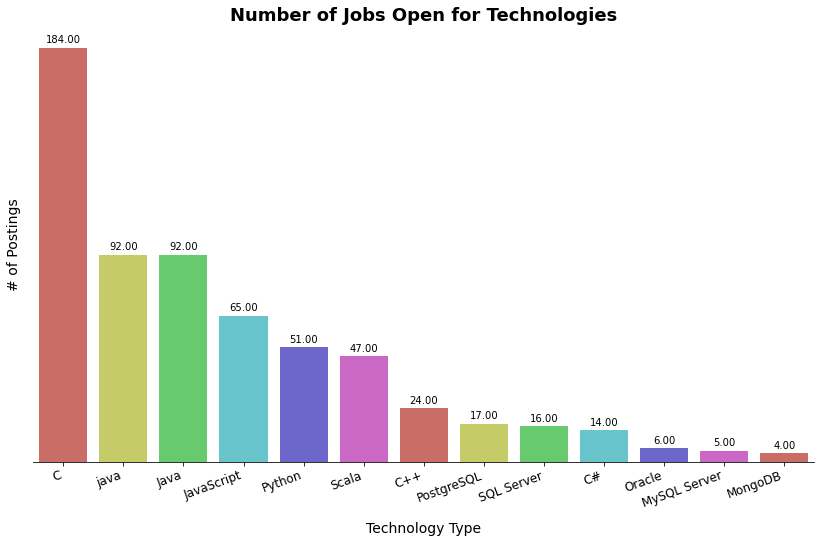

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


def hide_spine(*args):
    for arg in args:
        ax.spines[arg].set_visible(None)
        
    if 'left' in args:
        plt.yticks([])


def show_values(ax):
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height() + 2
        value = '{:.2f}'.format(p.get_height())
        ax.text(_x, _y, value, ha="center")
        
# Set bar colors
colors = sns.color_palette('hls')[:13]

# Set figure size
plt.figure(figsize=(14, 8))

# Plotting
ax = sns.barplot(data=df, x='technology', y='number of job posting', order=df.sort_values(by='number of job posting', ascending=False).technology,palette=colors)
plt.title("Number of Jobs Open for Technologies", fontsize=18, fontweight='bold')

# Change figure properties
plt.xticks(fontsize=12, rotation=20, ha='right')
plt.xlabel('Technology Type', fontsize=14, labelpad=12)
plt.ylabel('# of Postings', fontsize=14, labelpad=12);
show_values(ax)
hide_spine('top', 'right', 'left')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2021-6-25         | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
